In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc
%matplotlib inline

In [36]:
cd /Users/Jyothilal/Downloads/kaggle/digit_recognizer

C:\Users\Jyothilal\Downloads\kaggle\digit_recognizer


In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [41]:
a= train.iloc[0,1:].values

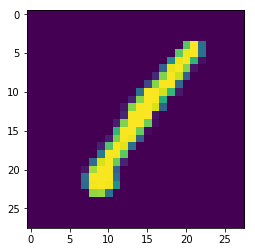

In [42]:
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [43]:
features = train.drop("label", axis=1)
target = train['label']

In [44]:
features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
target.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

## Cross Validation

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

## Random Forest Classifier

In [47]:
clf = rfc(n_estimators = 50)
scoring = 'accuracy'
score = cross_val_score(clf,features,target, cv = k_fold, n_jobs = 1, scoring = scoring)
#print(score)
round(np.mean(score)*100,2)

96.2

## Testing

In [48]:
clf = rfc()
clf.fit(features, target)
output = clf.predict(test)

In [49]:
output

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

## Submission

In [50]:
test['ImageId'] = np.arange(1,(len(test)+1))

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 785 entries, pixel0 to ImageId
dtypes: int32(1), int64(784)
memory usage: 167.6 MB


In [52]:
submission = pd.DataFrame({"ImageId" : test["ImageId"], "Label" : output})
submission.to_csv('submission_rfc.csv', index = False)